# Compositional Learning for Synchronous Parallel Automata (SCL* Algorithm)


In [1542]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, kstest, shapiro, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [1543]:
f = open("Configs/States.txt", "r")
minNumOfStates = int (f.readline())
maxNumOfStates = int(f.readline())

In [1544]:
realTestsDf =  pd.read_csv('Results/Parameters/Real Tests/Results.csv',index_col=False)
p2pTestsDf = pd.read_csv('Results/Parameters/Generated Tests/Point-To-Point/Results.csv', index_col=False)
ringTestsDf = pd.read_csv('Results/Parameters/Generated Tests/Ring/Results.csv', index_col=False)
starTestsDf = pd.read_csv('Results/Parameters/Generated Tests/Star/Results.csv', index_col=False)
meshTestsDf = pd.read_csv('Results/Parameters/Generated Tests/Mesh/Results.csv', index_col=False)
busTestsDf = pd.read_csv('Results/Parameters/Generated Tests/Bus/Results.csv', index_col=False)
bipartiteTestsDf = pd.read_csv('Results/Parameters/Generated Tests/Bipartite/Results.csv', index_col=False)

types = ['Real Tests', 'Point-To-Point Tests', 'Ring Tests', 'Star Tests', 'Mesh Tests', 'Bus Tests', 'Bipartite Tests']
allTests = {'Real Tests' : realTestsDf, 'Point-To-Point Tests' : p2pTestsDf, 'Ring Tests' : ringTestsDf,
            'Star Tests' : starTestsDf, 'Mesh Tests' : meshTestsDf, 'Bus Tests' : busTestsDf, 'Bipartite Tests' : bipartiteTestsDf}

In [1545]:
def assignAllTests(function, hasOneParam):
    for currentType in types:
        if hasOneParam:
            allTests[currentType] = function(allTests[currentType])
        else:
            allTests[currentType] = function(allTests[currentType], currentType)

## Clean data

In [1546]:
def roundData(data):
  return round(data, 3)

In [1547]:
def dropNas(data):
    data.dropna(axis=1, how='all')
    data.dropna()
    return(data)

In [1548]:
assignAllTests(dropNas, True)

In [1549]:
def selectTests(data, testType):
    print(testType + ":")
    for componentCounter in range(2, 10):
        currentSelected = data[data["CLSTAR_COMPONENTS"] == componentCounter]
        currentSelected = currentSelected[(currentSelected["STATES"] >= 100) & (currentSelected["STATES"] <= 30000)]
        print("\t For" + str(componentCounter) + " Components: " + str(len(currentSelected)) + ' Tests')
        if componentCounter == 2:
            selected = currentSelected
        else:
            selected = pd.concat([selected, currentSelected], ignore_index=True, sort=False)

    # selected = (
    #         selected
    #         .sort_values('CLSTAR_TOTAL_SYM')
    #         .drop_duplicates(
    #             subset=['CLSTAR_COMPONENTS', 'CLSTAR_TOTAL_SYM'],
    #             keep='first'
    #         )
    #         .copy()
    #     )
    return selected


In [1550]:
assignAllTests(selectTests, False)

Real Tests:
	 For2 Components: 0 Tests
	 For3 Components: 10 Tests
	 For4 Components: 14 Tests
	 For5 Components: 27 Tests
	 For6 Components: 66 Tests
	 For7 Components: 45 Tests
	 For8 Components: 0 Tests
	 For9 Components: 0 Tests
Point-To-Point Tests:
	 For2 Components: 0 Tests
	 For3 Components: 30 Tests
	 For4 Components: 30 Tests
	 For5 Components: 30 Tests
	 For6 Components: 34 Tests
	 For7 Components: 34 Tests
	 For8 Components: 34 Tests
	 For9 Components: 30 Tests
Ring Tests:
	 For2 Components: 0 Tests
	 For3 Components: 30 Tests
	 For4 Components: 30 Tests
	 For5 Components: 30 Tests
	 For6 Components: 30 Tests
	 For7 Components: 30 Tests
	 For8 Components: 30 Tests
	 For9 Components: 29 Tests
Star Tests:
	 For2 Components: 0 Tests
	 For3 Components: 30 Tests
	 For4 Components: 30 Tests
	 For5 Components: 24 Tests
	 For6 Components: 18 Tests
	 For7 Components: 9 Tests
	 For8 Components: 5 Tests
	 For9 Components: 7 Tests
Mesh Tests:
	 For2 Components: 0 Tests
	 For3 Component

In [1551]:
# Calculate mean without outliers
from scipy import stats
def trimmedMean(x):
  z = stats.zscore(x)
  d_z = x.loc[z<3,]
  return d_z.mean()

## Statistical Analysis

We cluster the benchmark into eight categories based on the FSM’s number of states to summerize the results and illusterate them.

In [1552]:
def doForAllTests(function, hasOneParam, param1 = None, param2 = None, param3 = None):
    for currentType in types:
        if hasOneParam:
            function(allTests[currentType])
        elif param1 == None:
            function(allTests[currentType], currentType)
        elif param2 == None:
            function(allTests[currentType], currentType, param1)
        elif param3 == None:
            function(allTests[currentType], currentType, param1, param2)
        else:
            function(allTests[currentType], currentType, param1, param2, param3)

In [1553]:
# Data Distribution
def printDataInfo(data, testType):
    print("For " + testType + "Tests:")
    print("\tCount:  ",data['FILE_NAME'].unique().size)
    print("\tMin:    ",data.groupby('FILE_NAME').agg(min)['STATES'].min())
    print("\tMax:    ",data.groupby('FILE_NAME').agg(min)['STATES'].max())

    print("\tmean:   ", data.groupby('FILE_NAME').agg(min)['STATES'].mean())

    print("\tstd:    ", data.groupby('FILE_NAME').agg(min)['STATES'].std())

In [1554]:
print(allTests)
doForAllTests(printDataInfo, False)

{'Real Tests':      Unnamed: 0  FILE_NAME  STATES  INPUTS  LSTAR_MQ_SYM  LSTAR_MQ_RST  \
0             0          1     173      11       4286448         49927   
1             1          2     173      11       4072353         48658   
2             2          3     173      11       5656138         57259   
3             3          4     173      11       2310336         36391   
4             4          5     117      17          8687          2618   
..          ...        ...     ...     ...           ...           ...   
157         157        158    5364      22         48422         11638   
158         158        159    5364      22         48422         11638   
159         159        160    4152      19         36119          8683   
160         160        161    4152      19         36119          8683   
161         161        162    4152      19         36119          8683   

     LSTAR_EQ_SYM  LSTAR_EQ_RST  LSTAR_TOTAL_SYM  LSTAR_TOTAL_RST  ...  \
0           76587     

C:\Users\Aryan\AppData\Local\Temp\ipykernel_5672\2789857924.py:5: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print("\tMin:    ",data.groupby('FILE_NAME').agg(min)['STATES'].min())
C:\Users\Aryan\AppData\Local\Temp\ipykernel_5672\2789857924.py:6: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print("\tMax:    ",data.groupby('FILE_NAME').agg(min)['STATES'].max())
C:\Users\Aryan\AppData\Local\Temp\ipykernel_5672\2789857924.py:8: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep cu

In [1555]:
def calculateProgress(data):
    data['CLSTAR_TOTAL_RST_progress'] = (1 - (data['CLSTAR_TOTAL_RST'] / data['CLSTAR_TOTAL_RST']))*100
    data['CLSTAR_TOTAL_SYM_progress'] = (1 - (data['CLSTAR_TOTAL_SYM'] / data['CLSTAR_TOTAL_SYM']))*100

    data['CLSTAR_MQ_SYM_progress'] = (1 - (data['CLSTAR_MQ_SYM'] / data['CLSTAR_MQ_SYM']))*100
    data['CLSTAR_MQ_RST_progress'] = (1 - (data['CLSTAR_MQ_RST'] / data['CLSTAR_MQ_RST']))*100
    data['CLSTAR_EQ_SYM_progress'] = (1 - (data['CLSTAR_EQ_SYM'] / data['CLSTAR_EQ_SYM']))*100
    data['CLSTAR_EQ_RST_progress'] = (1 - (data['CLSTAR_EQ_RST'] / data['CLSTAR_EQ_RST']))*100
    
    return(data)


In [1556]:
doForAllTests(calculateProgress, True)

# Plots

In [1557]:
sns.set(rc={'figure.figsize':(15,6)})

In [1558]:
def addTypeColumn(data, type):
    data["TYPE"] = type
    return data

In [1559]:
doForAllTests(addTypeColumn, False)

In [ ]:
def plotSingleTypeData(data, testType, yCol1, yCol2, yLabel):
    # filtered_df = (
    #     data
    #     .sort_values('CLSTAR_TOTAL_SYM')
    #     .drop_duplicates(
    #         subset=['CLSTAR_COMPONENTS', 'CLSTAR_TOTAL_SYM'],
    #         keep='first'
    #     )
    #     .copy()
    # )


    # filtered_df = filtered_df.assign(
    #     diff = filtered_df['LSTAR_TOTAL_SYM'] - filtered_df['CLSTAR_TOTAL_SYM']
    # )

    # filtered_df['score'] = filtered_df['diff']

    # result = (
    # filtered_df
    # .sort_values(['CLSTAR_COMPONENTS', 'score'], ascending=[True, True])
    # .groupby('CLSTAR_COMPONENTS', as_index=False)
    # .head(100)
    # )


    # result = data[10 * data['LSTAR_TOTAL_SYM'] >= data['CLSTAR_TOTAL_SYM']]

    result = (
    data
    .groupby('CLSTAR_COMPONENTS', as_index=False)
    .head(37)
    )

    d2 = result[['STATES', 'CLSTAR_COMPONENTS', yCol1, yCol2]]
    
    d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']] 
    d2 = d2.set_index(['#states', '#components'])
    
    d2 = d2[['L*', 'SCL*']].stack().reset_index()
    d2 = d2.rename(columns={"level_2": "method", 0: yLabel})
    
    g = sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=[yLabel],
                     hue="method", height=5, aspect=1.2, kind="reg", palette=['r', 'g'])
    g.fig.suptitle(testType, y=1.08)
    delta = int((maxNumOfStates - minNumOfStates + int(maxNumOfStates / 300)) / 60)
    g.axes[0, 0].set_xlim((minNumOfStates - delta, maxNumOfStates + delta))
    
    # Set x-axis to display only integer values
    g.axes[0, 1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    plt.yscale('log')
    if testType == 'Wanted Tests':
        if yLabel == "Total Number of Input Symbols":
            plt.savefig("Results/Plots/Symbols.png")
        else:
            plt.savefig("Results/Plots/Resets.png")


C:\Users\Aryan\AppData\Local\Temp\ipykernel_5672\3512262379.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_5672\3512262379.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_5672\3512262379.py:37: SettingWithCopyWarning: 


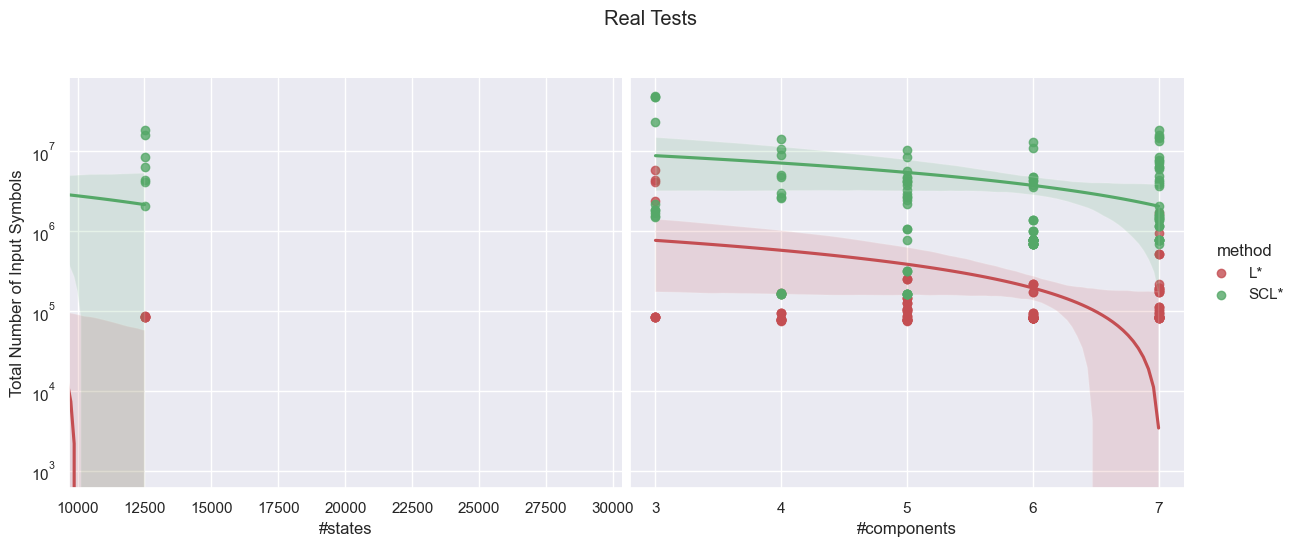

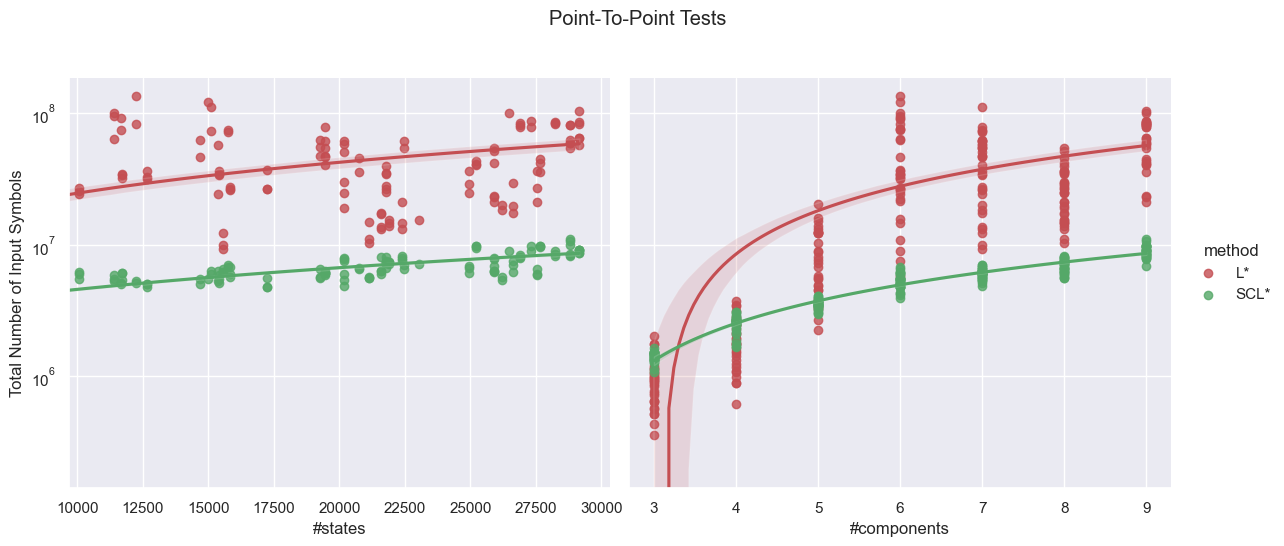

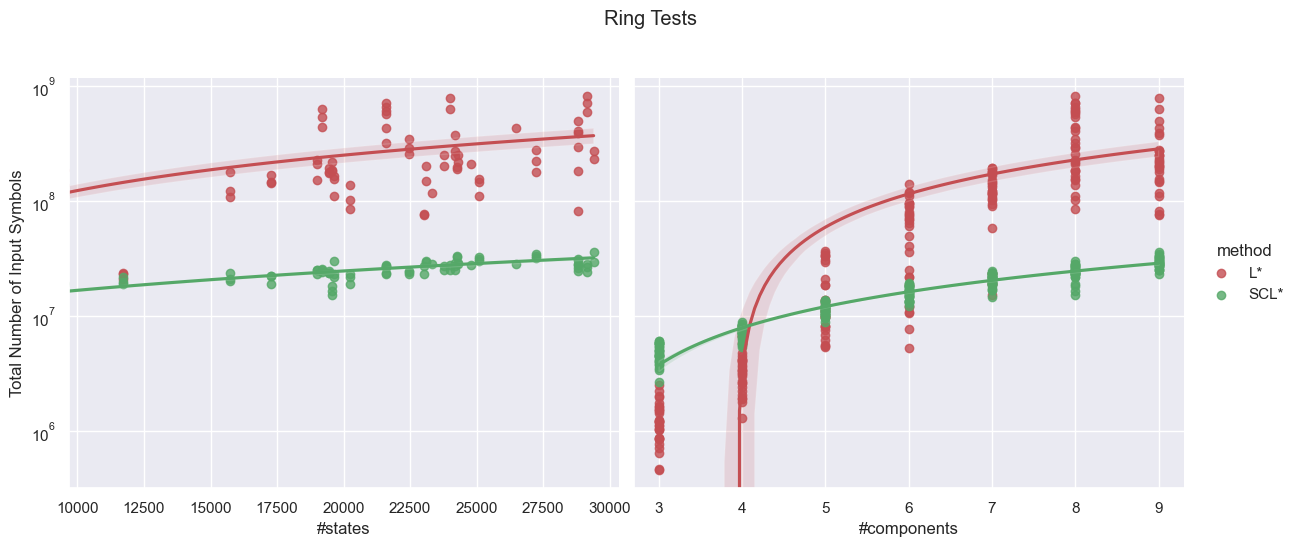

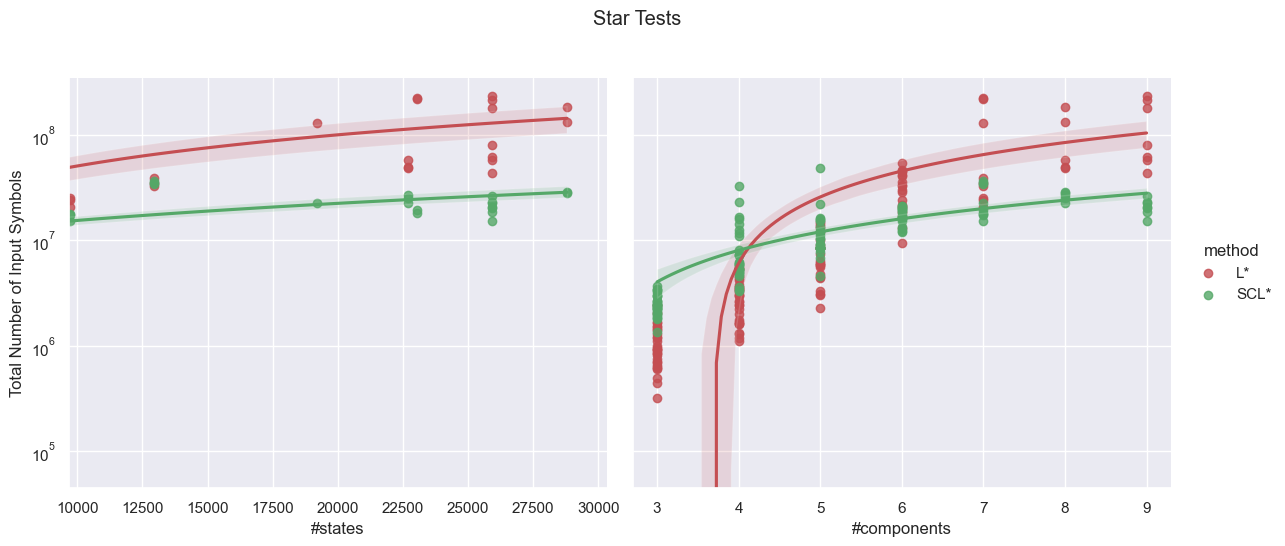

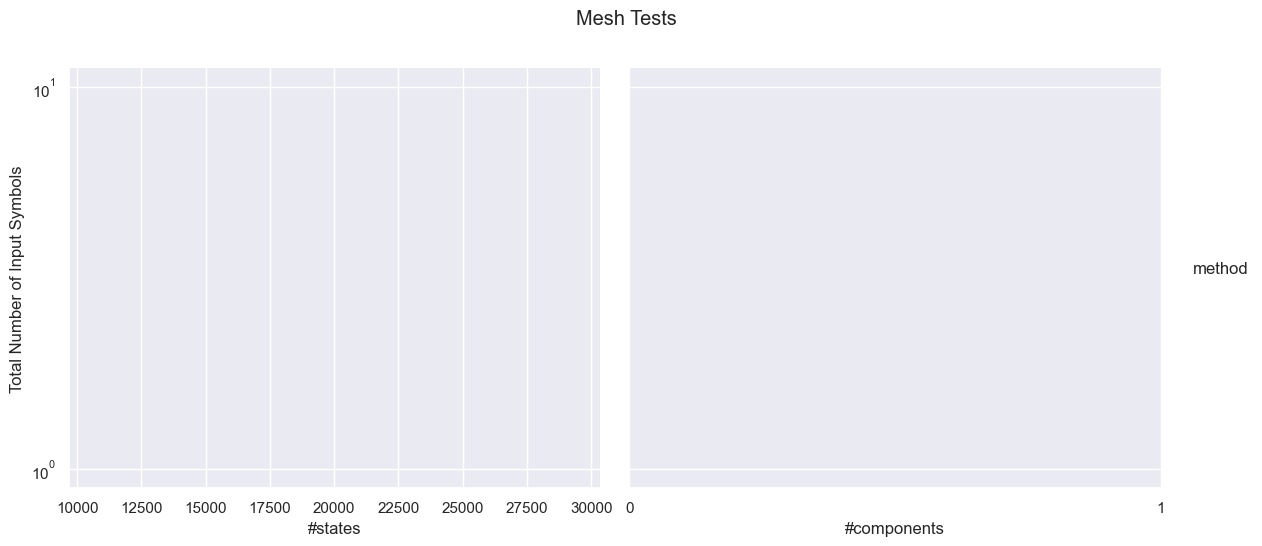

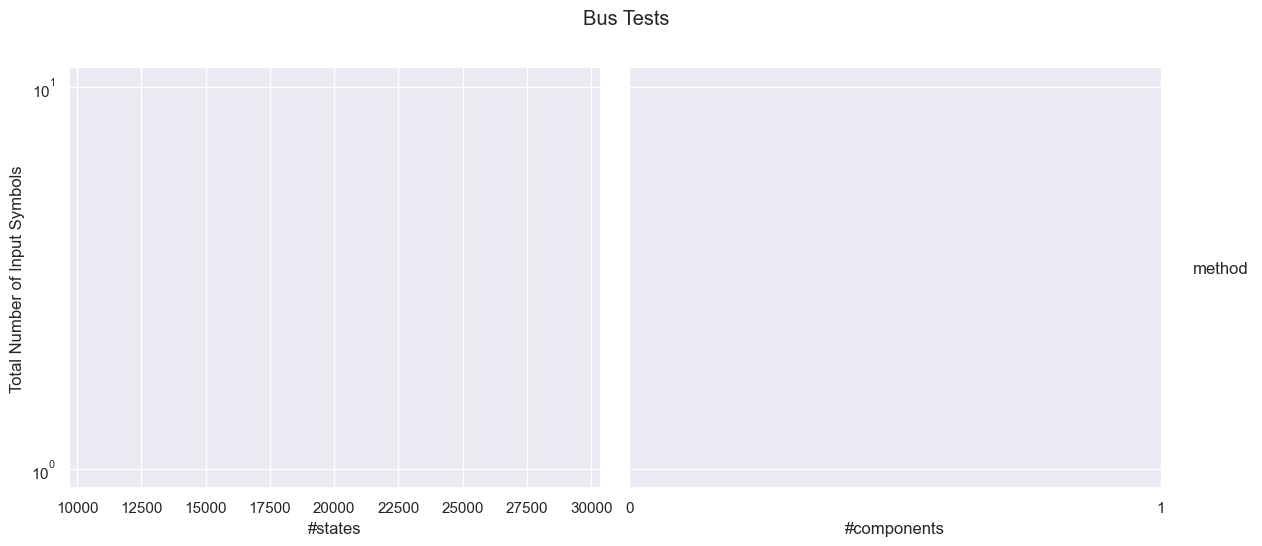

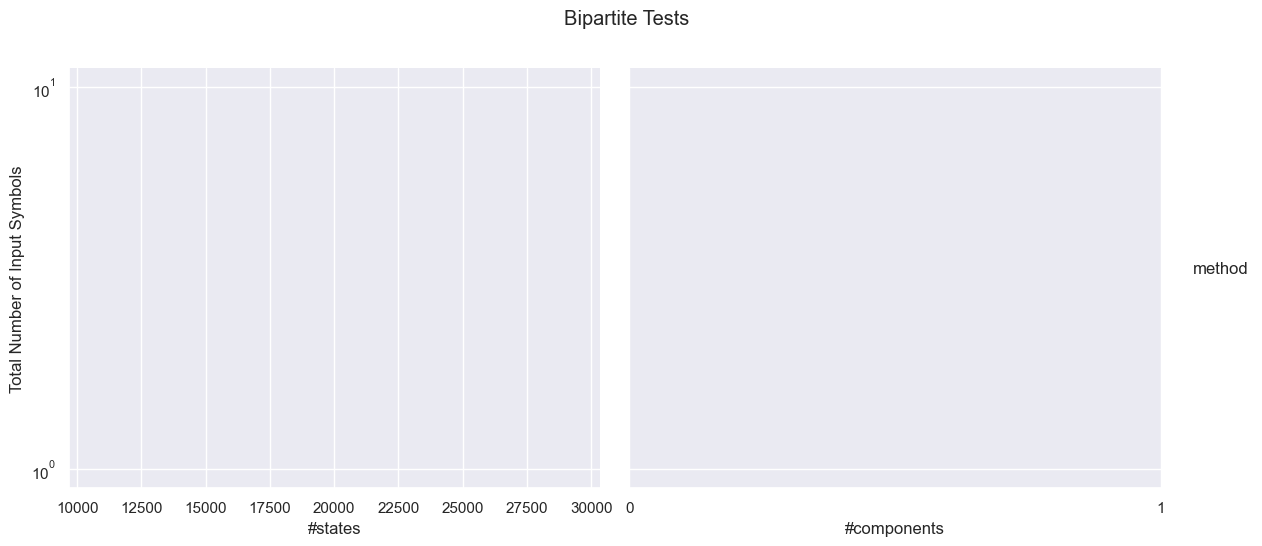

In [1561]:
doForAllTests(plotSingleTypeData, False, "LSTAR_TOTAL_SYM", "CLSTAR_TOTAL_SYM", "Total Number of Input Symbols")

C:\Users\Aryan\AppData\Local\Temp\ipykernel_5672\3512262379.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_5672\3512262379.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_5672\3512262379.py:37: SettingWithCopyWarning: 


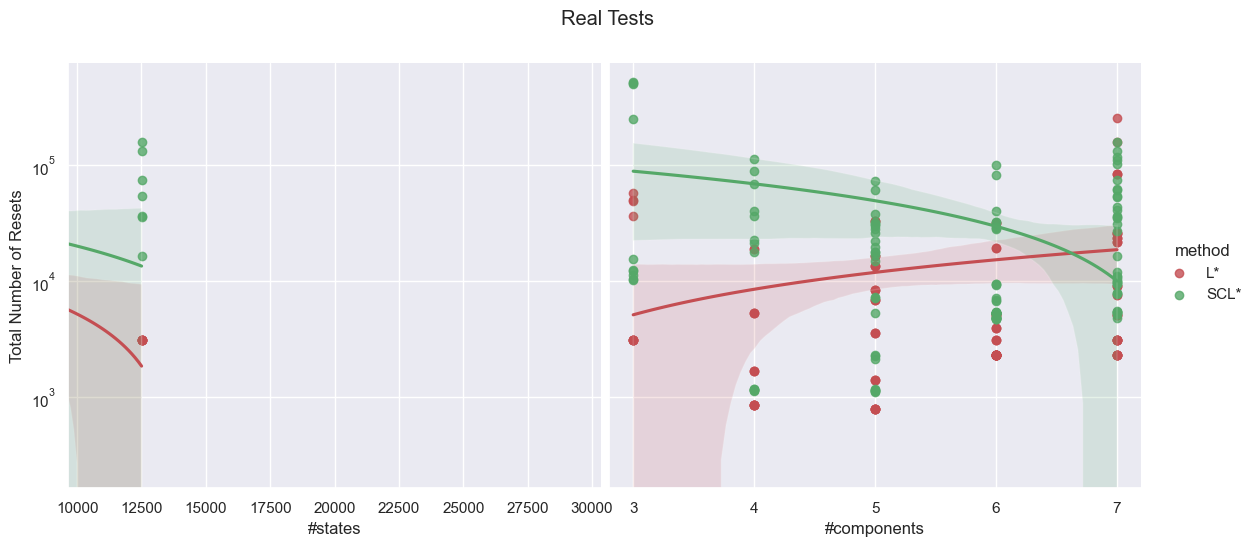

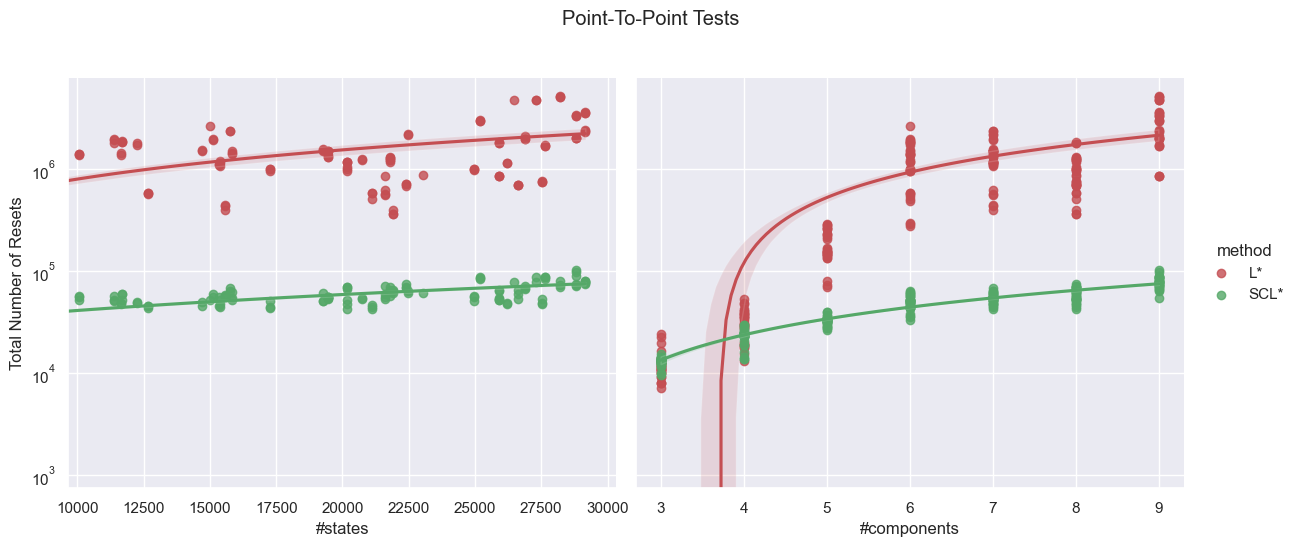

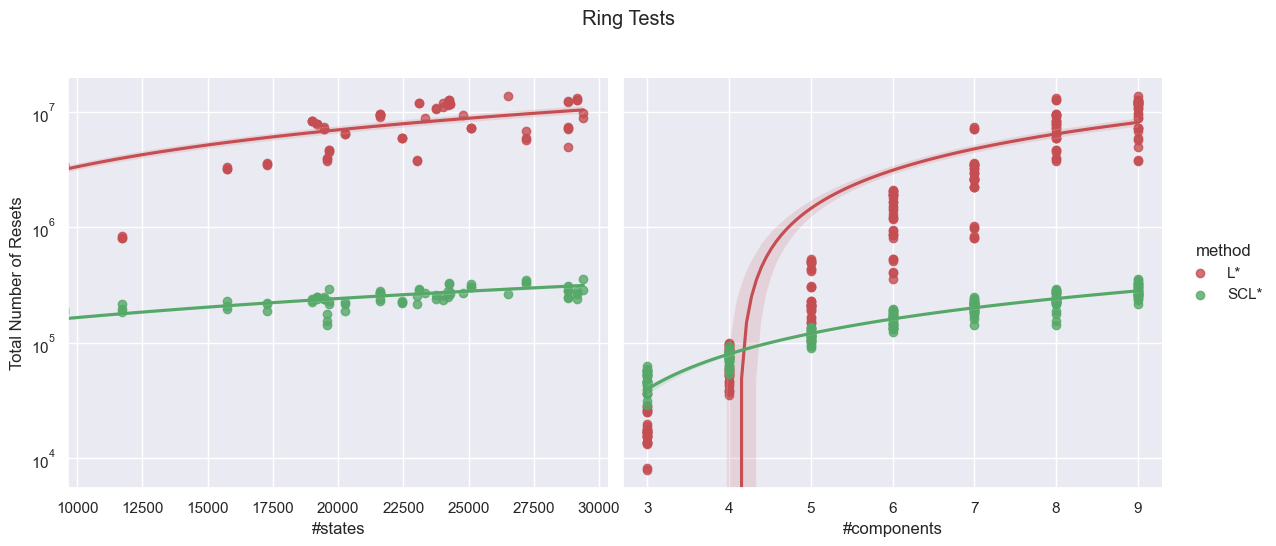

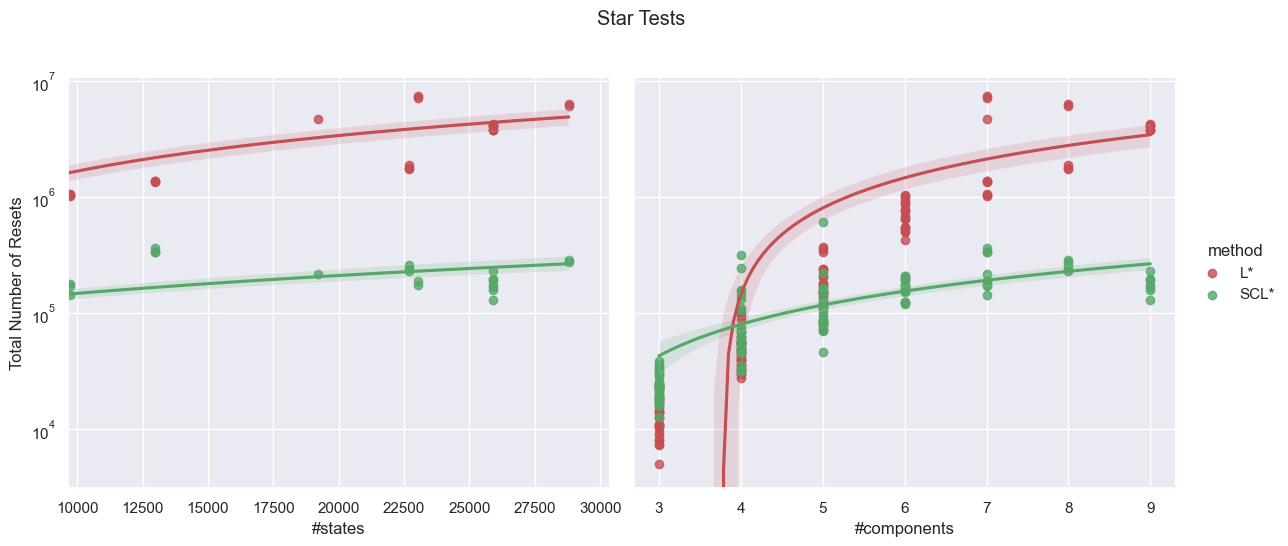

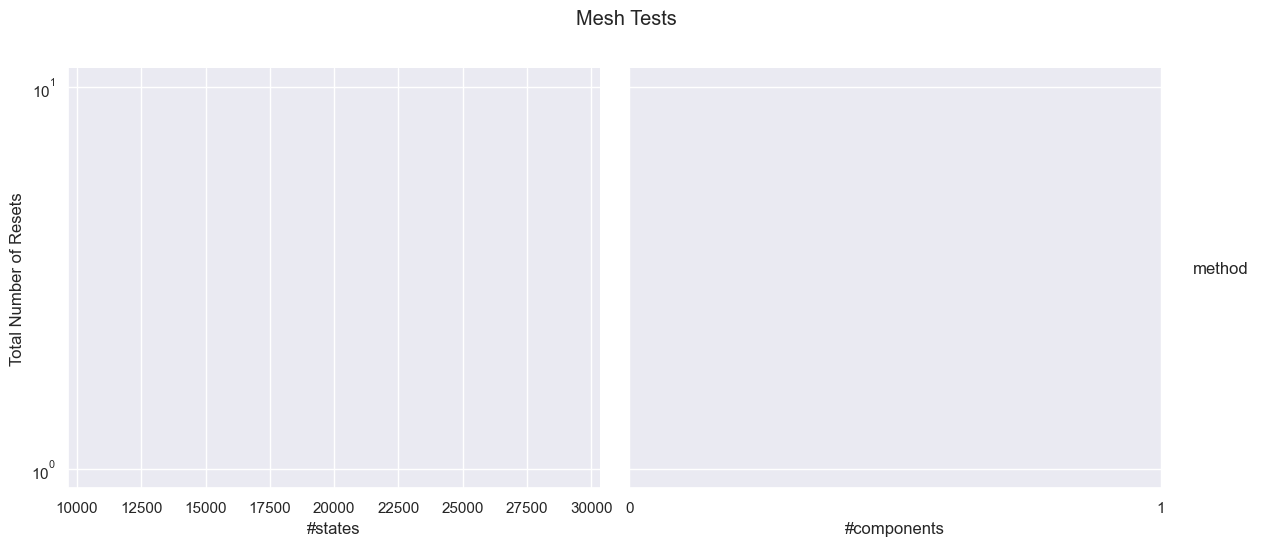

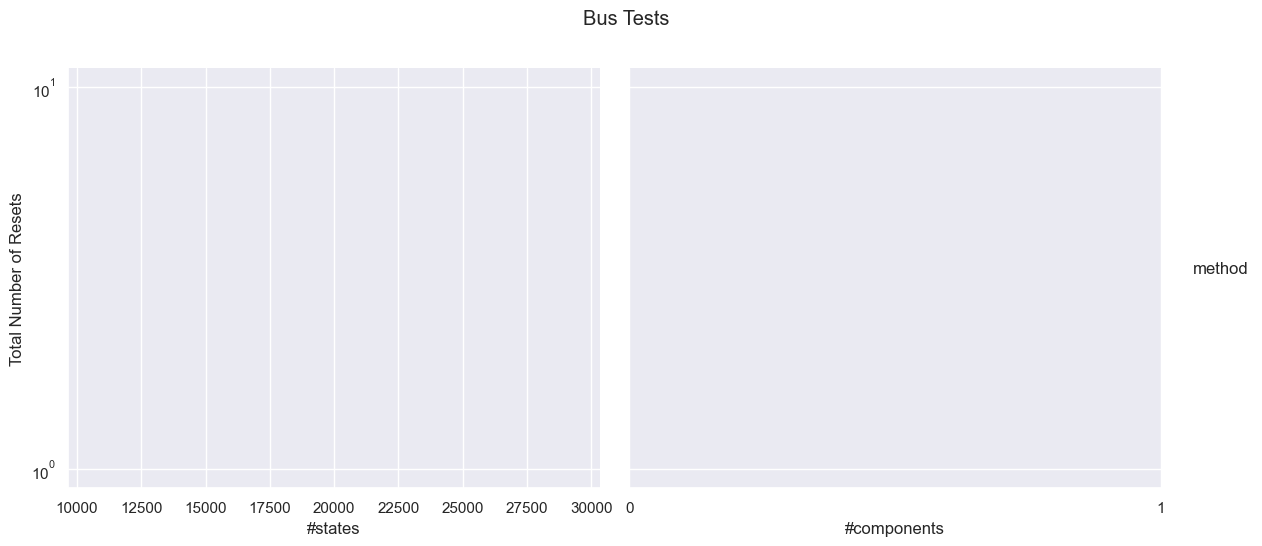

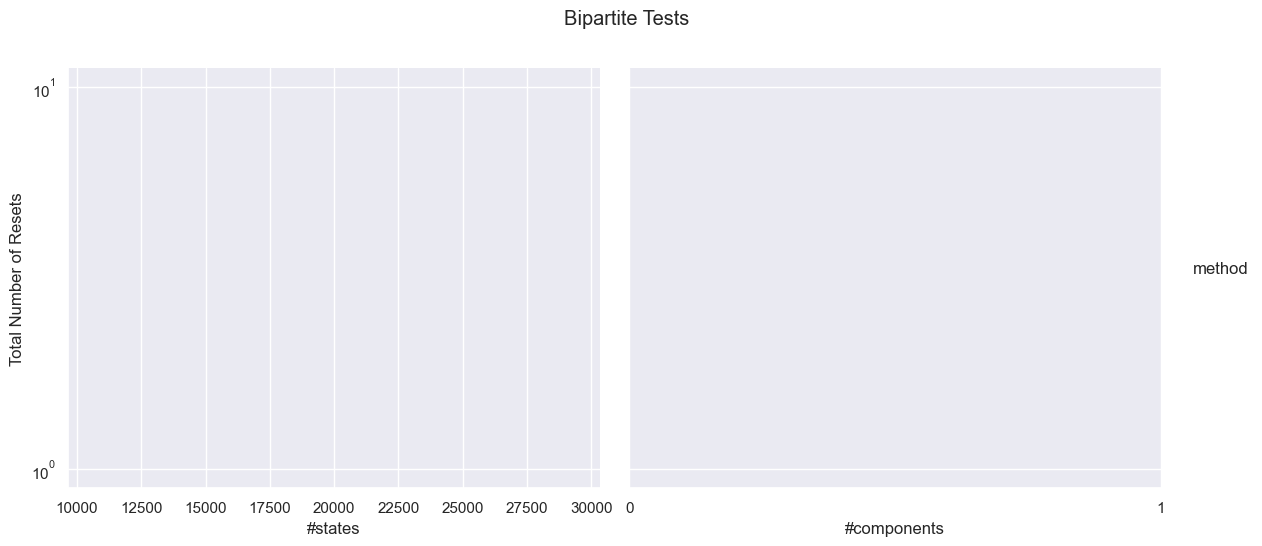

In [1562]:
doForAllTests(plotSingleTypeData, False, "LSTAR_TOTAL_RST", "CLSTAR_TOTAL_RST", "Total Number of Resets")

In [1563]:
# doForAllTests(plotSingleTypeData, False, "LSTAR_EQs", "CLSTAR_EQs", "Total Number Of Equivalence Queries")

In [1564]:
# doForAllTests(plotSingleTypeData, False, "LSTAR_MQs", "CLSTAR_MQs", "Total Number of Membership Queries")

In [1565]:
realTestsDf

,Unnamed: 0,FILE_NAME,STATES,INPUTS,LSTAR_MQ_SYM,LSTAR_MQ_RST,LSTAR_EQ_SYM,LSTAR_EQ_RST,LSTAR_TOTAL_SYM,LSTAR_TOTAL_RST,...,CLSTAR_MQ_RST,CLSTAR_EQ_SYM,CLSTAR_EQ_RST,CLSTAR_TOTAL_SYM,CLSTAR_TOTAL_RST,CLSTAR_EQs,CLSTAR_COMPONENTS,CLSTAR_ROUNDS,CLSTAR_MQs,CACHE
0,0,1,173,11,4286448,49927,76587,502,4363035,50429,...,450181,10757659,71689,48288241,521870,365,3,27,545507,True
1,1,2,173,11,4072353,48658,74709,503,4147062,49161,...,411533,14055500,93728,46962766,505261,427,3,27,507404,True
2,2,3,173,11,5656138,57259,75491,503,5731629,57762,...,410428,15713115,104688,47387673,515116,416,3,28,507810,True
3,3,4,173,11,2310336,36391,74682,507,2385018,36898,...,213614,5191118,34615,22838296,248229,240,3,16,258924,True
4,4,5,117,17,8687,2618,74356,500,83043,3118,...,237,1815178,12097,1816438,12334,159,3,7,1260,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,157,158,5364,22,48422,11638,75331,500,123753,12138,...,11176,5128625,34125,5935364,45301,341,7,11,18640,True
158,158,159,5364,22,48422,11638,74573,500,122995,12138,...,14893,5724149,38142,6688611,53035,410,7,13,24945,True
159,159,160,4152,19,36119,8683,74766,500,110885,9183,...,284,1592915,10600,1595411,10884,142,7,6,933,True
160,160,161,4152,19,36119,8683,76851,500,112970,9183,...,345,1371427,9102,1374326,9447,139,7,6,1041,True


In [1566]:
filtered_df = realTestsDf[realTestsDf['LSTAR_TOTAL_RST'] > realTestsDf['CLSTAR_TOTAL_RST']]
filtered_df

,Unnamed: 0,FILE_NAME,STATES,INPUTS,LSTAR_MQ_SYM,LSTAR_MQ_RST,LSTAR_EQ_SYM,LSTAR_EQ_RST,LSTAR_TOTAL_SYM,LSTAR_TOTAL_RST,...,CLSTAR_MQ_RST,CLSTAR_EQ_SYM,CLSTAR_EQ_RST,CLSTAR_TOTAL_SYM,CLSTAR_TOTAL_RST,CLSTAR_EQs,CLSTAR_COMPONENTS,CLSTAR_ROUNDS,CLSTAR_MQs,CACHE
54,54,55,144,15,172815,32415,75247,500,248062,32915,...,464,4599035,30597,4604485,31061,154,5,11,2221,True
55,55,56,144,15,172815,32415,75306,500,248121,32915,...,544,4138783,27580,4142082,28124,198,5,12,2863,True
65,65,66,5076,24,139992,31128,74843,500,214835,31628,...,663,4225249,28136,4229259,28799,295,6,10,2690,True
66,66,67,5076,24,139992,31128,74787,500,214779,31628,...,872,4295153,28642,4298760,29514,300,6,11,3175,True
77,77,78,1152,21,98805,21189,74318,500,173123,21689,...,377,1597382,10604,1605054,10981,152,7,7,1107,True
78,78,79,1152,21,98805,21189,75328,500,174133,21689,...,490,1444865,9618,1453248,10108,153,7,7,1230,True
79,79,80,1152,21,98805,21189,74400,500,173205,21689,...,302,1447309,9606,1449450,9908,153,7,7,1044,True
80,80,81,1872,24,442392,82968,75043,500,517435,83468,...,1201,6034117,40141,6045687,41342,351,7,12,4001,True
81,81,82,1872,24,442392,82968,74960,500,517352,83468,...,1080,7829022,52122,7835029,53202,376,7,13,4246,True
82,82,83,1872,24,442392,82968,75227,500,517619,83468,...,1013,6402082,42633,6411018,43646,340,7,12,3708,True


In [1567]:
def plotMergedData(p2pTestsDf, ringTestsDf, starTestsDf, bipartiteTestsDf, yCol, yLabel):
    sns.set(style="whitegrid")  
    
    fig, axes = plt.subplots(ncols=2)
    
    markers = ["v", "o", "*", "d"]
    colors = ["g", "b", "Orange", "r"]
    labels = ["P2P", "Ring", "Star", "Bipartite"]
    
    testDfs = [p2pTestsDf, ringTestsDf, starTestsDf, bipartiteTestsDf]
    
    typeLegend = [plt.scatter([], [], marker=marker, color=color, label=label) for\
        marker, color, label in zip(markers, colors, labels)]
    methodLegend = [plt.Line2D([], [], color='Black', label='SCL*'),\
        plt.Line2D([], [], color='Black', label='L*', linestyle='--')]
    
    delta = int((maxNumOfStates - minNumOfStates + int(maxNumOfStates / 300)) / 60)
    
    for ax, xCol, xLabel, xLim, yLim in zip(axes, ['STATES', 'CLSTAR_COMPONENTS'],\
        ['States', 'Components'], [[minNumOfStates - delta, maxNumOfStates + delta], [2.9, 9.1]], [400000 if 'SYM' in yCol else 1000] * 2):
        for df, marker, color in zip(testDfs, markers, colors):
            sns.regplot(data=df, x=xCol, y=yCol, marker=marker, color=color,
                        ax=ax, line_kws={'linestyle': '--'})
            sns.regplot(data=df, x=xCol, y=yCol.replace('LSTAR', 'CLSTAR'), marker=marker, color=color,
                        ax=ax)

        ax.set_xlabel(xLabel)
        ax.set_xlim(xLim)
        ax.set_ylim(bottom=yLim)
        ax.set_yscale('log')
        ax.set_facecolor("#e4e6eb")
        ax.set_axisbelow(True)
        ax.yaxis.grid(color='white')
        ax.xaxis.grid(color='white')
        
        type_legend = ax.legend(handles=typeLegend, loc='upper left')
        method_legend = ax.legend(handles=methodLegend, loc='upper right')
        ax.add_artist(type_legend)

    axes[0].set_ylabel(yLabel)
    axes[1].set_ylabel('')
  
    plt.tight_layout() 
    plt.show()


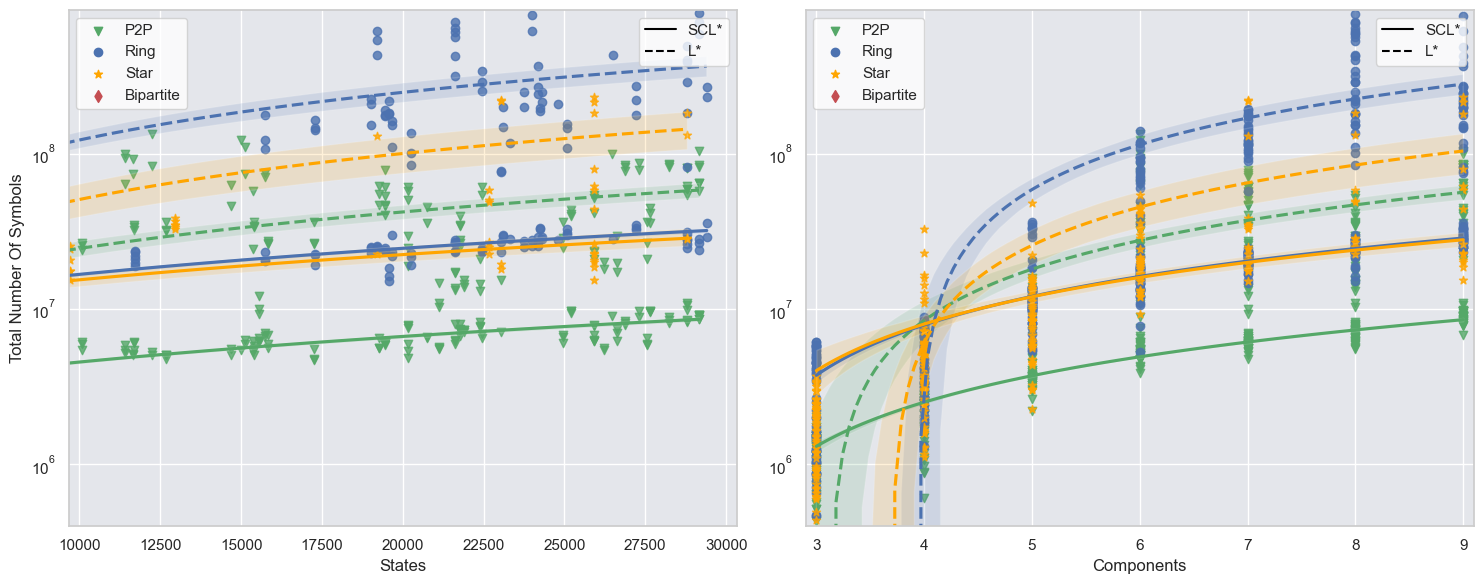

In [1568]:
plotMergedData(p2pTestsDf, ringTestsDf, starTestsDf, bipartiteTestsDf, "LSTAR_TOTAL_SYM", "Total Number Of Symbols")

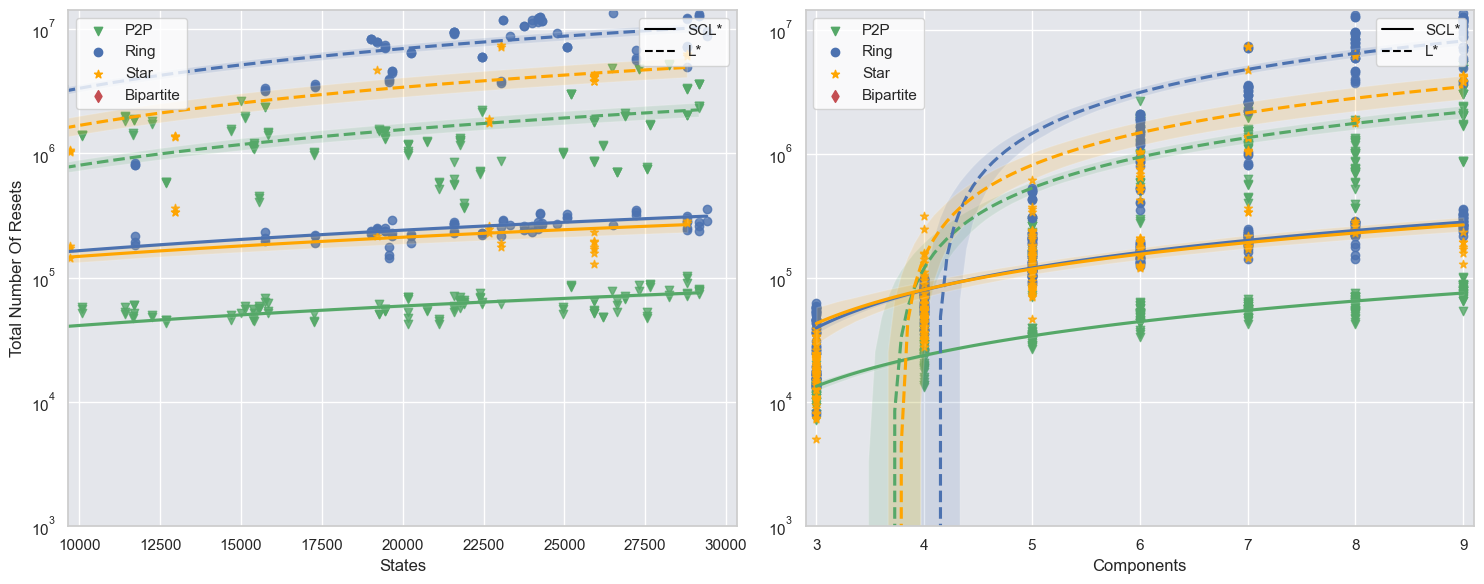

In [1569]:
plotMergedData(p2pTestsDf, ringTestsDf, starTestsDf, bipartiteTestsDf, "LSTAR_TOTAL_RST", "Total Number Of Resets")